In [112]:
# Nb: Data dapat berubah sewaktu-waktu sehingga analisa belum tentu sesuai
# Import library
import pandas as pd

# Mengambil data
dataset = pd.read_excel('Daily Update Data Agregat Covid-19 Jakarta.xlsx', sheet_name=1)

# Mengubah data tanggal menjadi urutan angka (sesuai index karena tanggal sudah urut) agar dapat di plot
dataset["Tanggal"] = dataset.index

# Cek 5 data pertama
dataset.head()

,Tanggal,Positif (Indonesia),Dirawat (Indonesia),Sembuh (Indonesia),Meninggal (Indonesia),Meninggal (Jakarta),Sembuh (Jakarta),Self-Isolation (Jakarta),Dirawat (Jakarta),Positif (Jakarta),...,Positif Harian (Indonesia),Dirawat Harian (Indonesia),Sembuh Harian (Indonesia),Meninggal Harian (Indonesia),Meninggal Harian (Jakarta),Sembuh Harian (Jakarta),Self-Isolation Harian (Jakarta),Dirawat Harian (Jakarta),Positif Harian (Jakarta),Positif Aktif Harian (Jakarta)
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,2,0,0,0,0,0,0,0,...,2,2,0,0,0,0,0,0,0,0
3,3,2,2,0,0,1,0,0,2,3,...,0,0,0,0,1,0,0,2,3,2
4,4,2,2,0,0,1,0,0,2,3,...,0,0,0,0,0,0,0,0,0,0


## 1. Membuat model regresi berdasarkan hari untuk kasus Positif Harian Jakarta (data diambil dari kolom Tanggal Positif Harian (Jakarta) dari sheet Data Indonesia dan Jakarta):

### A. Mulai dari 1 Maret 2020 semenjak kasus pertama

In [113]:
# Membagi feature dan label
X_1 = dataset["Tanggal"].values.reshape(-1,1)
y_1 = dataset["Positif Harian (Jakarta)"].values.reshape(-1,1)

In [114]:
X_1[:5]

array([[0],
       [1],
       [2],
       [3],
       [4]], dtype=int64)

In [115]:
y_1[:5]

array([[0],
       [0],
       [0],
       [3],
       [0]], dtype=int64)

In [116]:
# Melakukan regresi linear
# Mengimport library LinearRegression
from sklearn.linear_model import LinearRegression
import numpy as np

# Training model
lin_reg_true = LinearRegression()
lin_reg_1_true = lin_reg_true.fit(X_1,y_1)

# Melakukan prediksi
y_pred_1_true = lin_reg_1_true.predict(X_1)

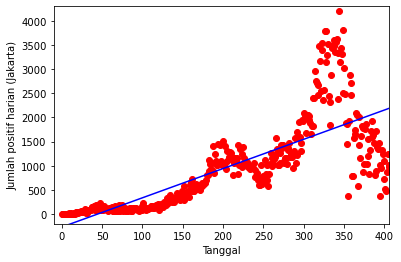

In [117]:
# Plotting hasil regresi
import matplotlib.pyplot as plt
plt.scatter(X_1, y_1, color='red')
plt.plot(X_1, y_pred_1_true, color='blue')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah positif harian (Jakarta)')
plt.xlim(-10,405)
plt.ylim(-200,4300)
plt.show()

### B. Mulai dari 1 Januari 2021 semenjak awal tahun baru

In [118]:
# Membagi feature dan label
X_2 = dataset["Tanggal"][306:].values.reshape(-1,1)
y_2 = dataset["Positif Harian (Jakarta)"][306:].values.reshape(-1,1)

In [119]:
X_2[:5]

array([[306],
       [307],
       [308],
       [309],
       [310]], dtype=int64)

In [120]:
y_2[:5]

array([[2022],
       [1956],
       [1895],
       [1657],
       [1832]], dtype=int64)

In [121]:
# Melakukan regresi linear
# Training model
lin_reg_true = LinearRegression(fit_intercept = True)
lin_reg_2_true = lin_reg_true.fit(X_2,y_2)

# Melakukan prediksi
y_pred_2_true = lin_reg_2_true.predict(X_2)

In [122]:
y_pred_2_true[:5]

array([[3212.62900408],
       [3189.93167152],
       [3167.23433896],
       [3144.53700641],
       [3121.83967385]])

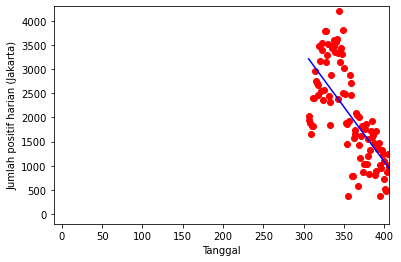

In [123]:
# Plotting hasil regresi
import matplotlib.pyplot as plt
plt.scatter(X_2, y_2, color='red')
plt.plot(X_2, y_pred_2_true, color='blue')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah positif harian (Jakarta)')
plt.xlim(-10,405)
plt.ylim(-200,4300)
plt.show()

### C. Mulai dari 9 Februari 2021 semenjak diadakan PPKM jilid 2

In [124]:
# Membagi feature dan label
X_3 = dataset["Tanggal"][345:].values.reshape(-1,1)
y_3 = dataset["Positif Harian (Jakarta)"][345:].values.reshape(-1,1)

In [125]:
X_3[:5]

array([[345],
       [346],
       [347],
       [348],
       [349]], dtype=int64)

In [126]:
y_3[:5]

array([[3144],
       [3437],
       [3309],
       [2514],
       [3810]], dtype=int64)

In [127]:
# Melakukan regresi linear
# Training model
lin_reg_false_3 = LinearRegression(fit_intercept = False)
lin_reg_true = LinearRegression(fit_intercept = True)
lin_reg_3_true = lin_reg_true.fit(X_3,y_3)

# Melakukan prediksi
y_pred_3_true = lin_reg_3_true.predict(X_3)

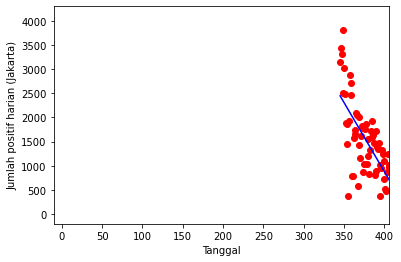

In [128]:
# Plotting hasil regresi
import matplotlib.pyplot as plt
plt.scatter(X_3, y_3, color='red')
plt.plot(X_3, y_pred_3_true, color='blue')
# plt.plot(X_3, y_pred_3_false, color='black')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah positif harian (Jakarta)')
plt.xlim(-10,405)
plt.ylim(-200,4300)
plt.show()

In [129]:
print("Nilai m kasus pertama:", lin_reg_1_true.coef_[0][0])
print("Nilai m kasus kedua:", lin_reg_2_true.coef_[0][0])
print("Nilai m kasus ketiga:", lin_reg_3_true.coef_[0][0])

Nilai m kasus pertama: 6.056184975049072
Nilai m kasus kedua: -22.697332556785085
Nilai m kasus ketiga: -28.600689985142665


In [130]:
# Tanggal 5 April 2021 = indeks 400
# Tanggal presentasi 11 April 2021 = indeks 400 + 6 = 406
print("Prediksi dari model pertama:", lin_reg_1_true.predict([[406]])[0][0])
print("Prediksi dari model kedua:", lin_reg_2_true.predict([[406]])[0][0])
print("Prediksi dari model ketiga:", lin_reg_3_true.predict([[406]])[0][0])

Prediksi dari model pertama: 2191.4866310160423
Prediksi dari model kedua: 942.8957483983686
Prediksi dari model ketiga: 704.1628264208921


**Analisa:**
1. Nilai m berpengaruh pada kemiringan dari hasil prediksi. Semakin tinggi nilai m, maka garis hasil prediksi akan semakin miring (semakin mendekati garis tegak vertikal). Semakin tinggi nilai m juga mengindikasikan bahwa pertambahan data semakin cepat seiring berjalannya waktu. Dalam kasus diatas, kasus kedua memiliki m paling tinggi, maka dapat diartikan bahwa pertambahan kasus positif harian di Jakarta meningkat paling tajam pada kasus kedua.
2. Model regresi yang paling mendekati keadaan sebenarnya adalah model kedua (target: 1031), angka hasil prediksi ini masih jauh dari kenyataan karena terlihat bahwa data tidak terseparasi secara linear, tetapi kita memaksa untuk menggunakan model regresi linear.

## 2. Membuat scatter plot matrix dan mencari nilai korelasi terhadap Positif Harian (Jakarta) (data diambil dari kolom Positif Harian (Jakarta) dari sheet Data Indonesia dan Jakarta) dengan:

### Data Tes Harian, Positive Harian, dan Positivity Harian untuk judul kolom Total DKI Jakarta dari sheet RDT Ag (Anti Gen)

In [131]:
# Load dataset dari sheet "RDT Ag"
dataset_1 = pd.read_excel('Daily Update Data Agregat Covid-19 Jakarta.xlsx', sheet_name = "RDT Ag")

# Mengambil kolom "Tanggal" dan "Total DKI Jakarta"
dataset_1 = pd.concat([dataset_1.iloc[:,1],dataset_1.iloc[:, 14:]], axis = 1)

# Memperbaiki format data
dataset_1.columns = dataset_1.iloc[0].values
dataset_1.drop(0, inplace = True)
dataset_1.reset_index(inplace = True, drop = True)

# Menampilkan 5 data pertama
dataset_1.head()

,Tgl,Tes Harian,Positif Harian,Negatif Harian,Positivity Rate Harian,Total Kumulatif,Positif Kumulatif,Negatif Kumulatif,Positivity Rate Kumulatif
0,2021-01-01 00:00:00,1192,76,1116,0.063758,1192,76,1116,0.063758
1,2021-01-02 00:00:00,0,0,0,NaN,1192,76,1116,0.063758
2,2021-01-03 00:00:00,607,24,583,0.039539,1799,100,1699,0.055586
3,2021-01-04 00:00:00,0,0,0,NaN,1799,100,1699,0.055586
4,2021-01-05 00:00:00,0,0,0,NaN,1799,100,1699,0.055586


In [142]:
# # Mengambil data positif harian Jakarta
data_1 = dataset.iloc[370:, [-2]]
data_1.reset_index(inplace=True, drop=True)

# Mengambil data Tes Harian, Positive Harian, dan Positivity
data_2 = dataset_1.iloc[63:, [1,2,4]]
data_2.reset_index(inplace=True, drop=True)

# Menggabungkan data yang diperlukan
data = pd.concat([data_1, data_2], axis=1)

# Menggantikan 0/0 sebagai 0
data["Positivity Rate Harian"].replace('#DIV/0!', 0, inplace=True)

# Mengubah tipe data dari object ke integer
data = data.astype(float)

data.tail()

,Positif Harian (Jakarta),Tes Harian,Positif Harian,Positivity Rate Harian
32,487.0,4373.0,75.0,0.017151
33,862.0,3665.0,74.0,0.020191
34,1239.0,4306.0,96.0,0.022294
35,1013.0,4619.0,104.0,0.022516
36,977.0,4081.0,65.0,0.015927


In [143]:
# Membuat correlation matrix
print("Nilai korelasi terhadap Positif Harian (Jakarta):")
data.corr()["Positif Harian (Jakarta)"].sort_values(ascending=False)

Nilai korelasi terhadap Positif Harian (Jakarta):


Positif Harian (Jakarta)    1.000000
Positivity Rate Harian      0.629768
Positif  Harian             0.138776
Tes Harian                 -0.241099
Name: Positif Harian (Jakarta), dtype: float64

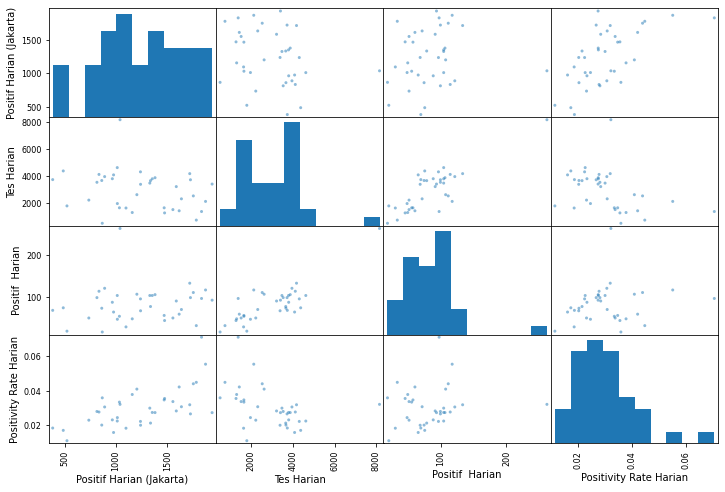

In [144]:
# Menampilkan scatter plot matrix 
from pandas.plotting import scatter_matrix
scatter_matrix(data, figsize=(12,8))
plt.show()

### Data, Vaksinasi 1, Vaksinasi 2, Persentase 1, Persentase 2 untuk judul kolom Tenaga Kesehatan, Lanjut Usia, Pelayan Publik, dan Total untuk judul DKI dari sheet Vaksinasi

In [145]:
# Load dataset dari sheet "Vaksinasi"
dataset_2 = pd.read_excel('Daily Update Data Agregat Covid-19 Jakarta.xlsx', sheet_name = "Vaksinasi")

# Mengambil kolom "DKI"
dataset_2 = dataset_2.iloc[:, :21]

# Memperbaiki format data
dataset_2.columns = dataset_2.iloc[3].values
dataset_2.drop([0,1,2,3], inplace = True)
dataset_2.reset_index(inplace = True, drop = True)

# Membagi data sesuai status sosial dan mengganti nama kolom agar unik (tidak sama)
dataset_tenaga_kesehatan = pd.concat([dataset_2.iloc[:,0],dataset_2.iloc[:, 2:6]], axis = 1)
dataset_tenaga_kesehatan.columns = ["Tanggal", "Vaksinasi 1_tenaga_kesehatan", "Vaksinasi 2_tenaga_kesehatan", "Persentase 1_tenaga_kesehatan", "Persentase 2_tenaga_kesehatan"]
dataset_lansia = dataset_2.iloc[:, 7:11]
dataset_lansia.columns = ["Vaksinasi 1_lansia", "Vaksinasi 2_lansia", "Persentase 1_lansia", "Persentase 2_lansia"]
dataset_pelayanpublik = dataset_2.iloc[:, 12:16]
dataset_pelayanpublik.columns = ["Vaksinasi 1_pelayan_publik", "Vaksinasi 2_pelayan_publik", "Persentase 1_pelayan_publik", "Persentase 2_pelayan_publik"]
dataset_total = dataset_2.iloc[:, 17:21]
dataset_total.columns = ["Vaksinasi 1_total", "Vaksinasi 2_total", "Persentase 1_total", "Persentase 2_total"]

In [152]:
# Menggabungkan data
vaksinasi = pd.concat([dataset_tenaga_kesehatan, dataset_lansia, dataset_pelayanpublik, dataset_total], axis = 1)
vaksinasi = vaksinasi.iloc[:, 1:]
vaksinasi.reset_index(inplace=True, drop=True)

# Mengambil data positif harian Jakarta
data_1 = dataset.iloc[370:, [-2]]
data_1.reset_index(inplace=True, drop=True)

# Menggabungkan data positif harian Jakarta dan data vaksinasi
vaksinasi = pd.concat([data_1, vaksinasi], axis = 1)

# Mengubah tipe data dari object menjadi float
vaksinasi = vaksinasi.astype(float)

# Membuat correlation matrix
print("Nilai korelasi terhadap Positif Harian (Jakarta):")
vaksinasi.corr()["Positif Harian (Jakarta)"].sort_values(ascending=False)

Nilai korelasi terhadap Positif Harian (Jakarta):


Positif Harian (Jakarta)         1.000000
Persentase 1_tenaga_kesehatan    0.327881
Vaksinasi 1_tenaga_kesehatan     0.327881
Vaksinasi 2_tenaga_kesehatan    -0.433778
Persentase 2_tenaga_kesehatan   -0.433778
Persentase 1_lansia             -0.489690
Vaksinasi 1_lansia              -0.489690
Persentase 1_total              -0.493763
Vaksinasi 1_total               -0.493763
Persentase 1_pelayan_publik     -0.502233
Vaksinasi 1_pelayan_publik      -0.502233
Persentase 2_lansia             -0.504161
Vaksinasi 2_lansia              -0.504161
Vaksinasi 2_pelayan_publik      -0.518795
Persentase 2_pelayan_publik     -0.518795
Persentase 2_total              -0.521117
Vaksinasi 2_total               -0.521117
Name: Positif Harian (Jakarta), dtype: float64

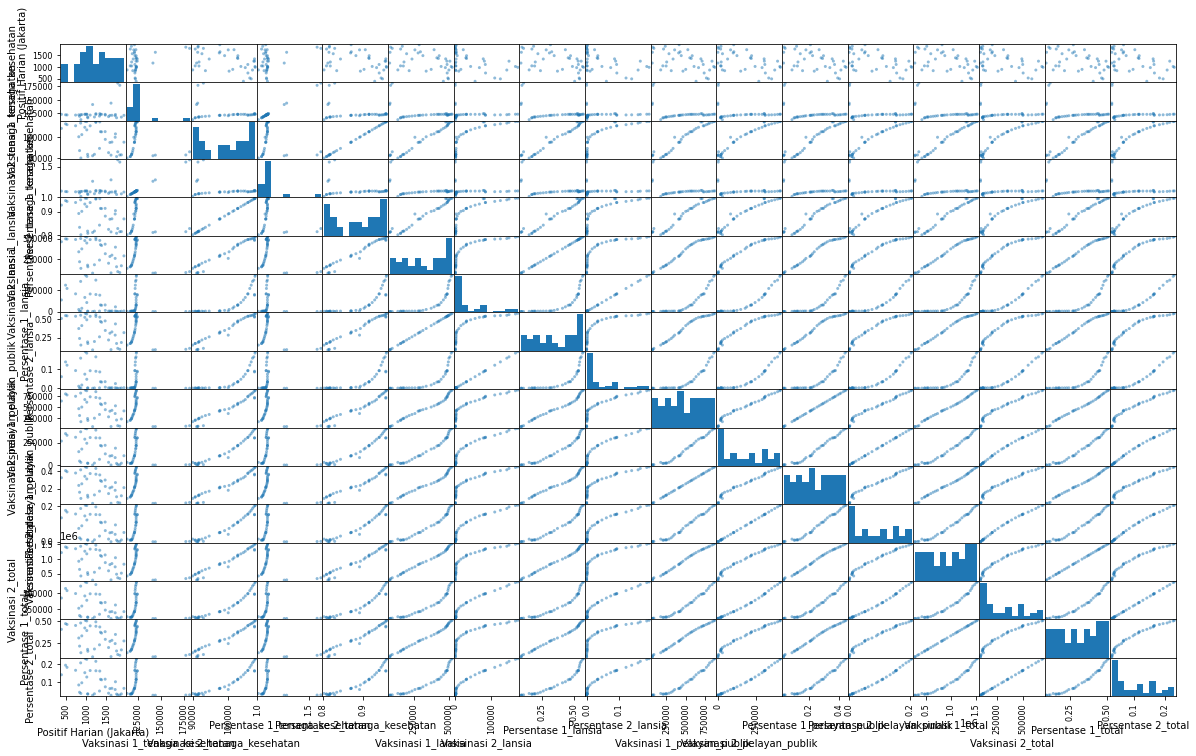

In [153]:
scatter_matrix(vaksinasi, figsize=(20,12))
plt.show()

**Analisa:**
1. Untuk data dari sheet RDT Ag (Antigen), nilai korelasi terhadap Positif Harian (Jakarta) paling rendah terdapat pada Tes Harian, yaitu sebesar -0.156879. Hal ini membuktikan bahwa untuk menekan laju pertambahan kasus covid-19 dibutuhkan peningkatan jumlah tes agar orang yang terpapar dapat segera ditemukan dan penyebaran lebih lanjut dapat dicegah.
2. Untuk data dari sheet Vaksinasi, nilai korelasi terhadap Positif Harian (Jakarta) paling rendah terdapat pada Vaksinasi 2 pelayan publik dan Persentase 2 pelayan publik, yaitu sebesar -0.519601. Hal ini membuktikan bahwa keputusan pemerintah untuk melalakukan vaksinasi adalah keputusan yang tepat, terutama kepada pelayan publik. Pemberian vaksinasi mampu menekan pertambahan kasus positif di Jakarta hingga lebih dari 50%.

## 3. Dari data pada langkah 2, buatlah model regresi dari data tersebut dengan menggunakan model machine learning berikut:

In [154]:
# Menggabungkan data dari langkah 2
datasets = pd.concat([data,vaksinasi.iloc[:, 1:]], axis = 1)

# # Mendefinisikan feature dan target variable
X = datasets.drop(columns=["Positif Harian (Jakarta)"]).values
y = datasets[["Positif Harian (Jakarta)"]].values

# # Melakukan feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Membagi data uji dan data latih dimana data uji merupakan data dari tanggal 5 Maret 2021 sampai 5 April 2021 dan data uji dari tanggal 6 April 2021 sampai 13 April 2021.
X_train = X[:32]
X_test = X[32:]
y_train  = y[:32]
y_test = y[32:]

### Decision Tree Regressor

In [155]:
vaksinasi

,Positif Harian (Jakarta),Vaksinasi 1_tenaga_kesehatan,Vaksinasi 2_tenaga_kesehatan,Persentase 1_tenaga_kesehatan,Persentase 2_tenaga_kesehatan,Vaksinasi 1_lansia,Vaksinasi 2_lansia,Persentase 1_lansia,Persentase 2_lansia,Vaksinasi 1_pelayan_publik,Vaksinasi 2_pelayan_publik,Persentase 1_pelayan_publik,Persentase 2_pelayan_publik,Vaksinasi 1_total,Vaksinasi 2_total,Persentase 1_total,Persentase 2_total
0,1159.0,141425.0,91078.0,1.259339,0.811017,76451.0,0.0,0.083862,0.000000,64121.0,0.0,0.032437,0.000000,281997.0,91078.0,0.093977,0.030352
1,1616.0,144046.0,91379.0,1.282678,0.813697,79421.0,0.0,0.087120,0.000000,66484.0,0.0,0.033633,0.000000,289951.0,91379.0,0.096628,0.030453
2,1834.0,177126.0,91460.0,1.577243,0.814418,83628.0,0.0,0.091734,0.000000,73752.0,2514.0,0.037310,0.001272,334506.0,93974.0,0.111476,0.031317
3,1783.0,181237.0,92988.0,1.613850,0.828025,95140.0,1.0,0.104362,0.000001,85333.0,3989.0,0.043168,0.002018,361710.0,96978.0,0.120542,0.032319
4,867.0,113326.0,89984.0,1.009127,0.801275,135128.0,675.0,0.148227,0.000740,174685.0,29195.0,0.088369,0.014769,423139.0,119854.0,0.141014,0.039942
5,1040.0,116791.0,90681.0,1.039982,0.807482,154251.0,1100.0,0.169203,0.001207,202452.0,17773.0,0.102416,0.008991,473494.0,109554.0,0.157795,0.036510
6,1754.0,116823.0,90693.0,1.040267,0.807589,154915.0,1103.0,0.169932,0.001210,211754.0,17903.0,0.107122,0.009057,483492.0,109699.0,0.161127,0.036558
7,1873.0,118086.0,91521.0,1.051513,0.814962,167086.0,1291.0,0.183282,0.001416,234403.0,20226.0,0.118580,0.010232,519575.0,113038.0,0.173152,0.037671
8,1034.0,118283.0,91748.0,1.053268,0.816983,174327.0,1444.0,0.191225,0.001584,245355.0,21272.0,0.124120,0.010761,537965.0,114464.0,0.179280,0.038146
9,1204.0,118301.0,91764.0,1.053428,0.817125,179024.0,1444.0,0.196378,0.001584,252763.0,21413.0,0.127868,0.010832,550088.0,114621.0,0.183321,0.038198


In [157]:
# Menacari max_depth untuk decision tree
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

lists = []
for i in range(1,100):
    reg = DecisionTreeRegressor(max_depth = i, random_state=0)
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    lists.append(mean_squared_error(y_test, y_pred))
print("MSE minimum =", min(lists), "dengan max depth =", lists.index(min(lists))+1)

MSE minimum = 52941.05 dengan max depth = 5


In [158]:
# Membuat model decision tree regressor dengan max depth = 5
tree_reg = DecisionTreeRegressor(max_depth = 5, random_state=42)
tree_reg.fit(X_train, y_train)

# Melakukan prediksi
y_pred_tree = tree_reg.predict(X_test)
y_pred_tree

array([ 453.5, 1240. , 1240. , 1240. , 1240. ])

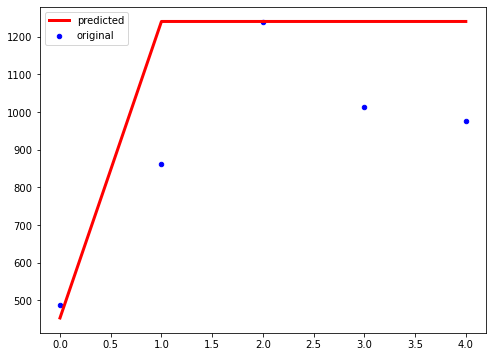

In [159]:
# plotting model
plt.figure(figsize=(8,6))
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=20, color="blue", label="original")
plt.plot(x_ax, y_pred_tree, color="red", label="predicted", linewidth=3)
plt.legend()
plt.show()

### Gradient Boost

In [160]:
# Mencari loss function untuk gradient boost regressor
from sklearn.ensemble import GradientBoostingRegressor

for i in {'ls', 'lad', 'huber', 'quantile'}:
    gradient_reg = GradientBoostingRegressor(loss = i, random_state=0)
    gradient_reg.fit(X_train, y_train.ravel())
    y_pred_2 = gradient_reg.predict(X_test)
    print("Loss =", i + ", MSE =", mean_squared_error(y_test, y_pred_2))

Loss = ls, MSE = 77067.12961656162
Loss = lad, MSE = 96119.54494833422
Loss = quantile, MSE = 455310.96977418597
Loss = huber, MSE = 57839.0871971637


In [161]:
# Membuat model gradient boost regressor dengan loss = quantile
gradient_reg = GradientBoostingRegressor(loss = "quantile", random_state=0)
gradient_reg.fit(X_train, y_train.ravel())
y_pred_gradient = gradient_reg.predict(X_test)
y_pred_gradient

array([1512.81429815, 1509.53529135, 1609.6912887 , 1629.55136376,
       1513.10661754])

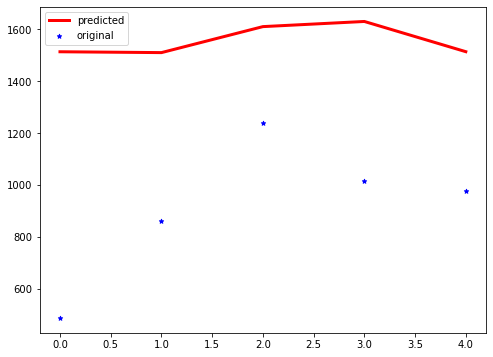

In [162]:
# plotting model
plt.figure(figsize=(8,6))
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=20, color="blue", label="original", marker="*")
plt.plot(x_ax, y_pred_gradient, color="red", label="predicted", linewidth=3)
plt.legend()
plt.show()

### Random Forest Regressor

In [163]:
# Menacari max_depth untuk rendom forest regressor
from sklearn.ensemble import RandomForestRegressor

lists = []
for i in range(1,100):
    reg = RandomForestRegressor(max_depth=i, random_state=0)
    reg.fit(X_train, y_train.ravel())
    y_pred = reg.predict(X_test)
    lists.append(mean_squared_error(y_test, y_pred))
print("MSE minimum =", min(lists), "dengan max depth =", lists.index(min(lists))+1)

MSE minimum = 37545.294309019504 dengan max depth = 2


In [164]:
# Membuat model gradient boost regressor dengan max depth = 2
forest_reg = RandomForestRegressor(max_depth=2, random_state=0)
forest_reg.fit(X_train, y_train.ravel())
y_pred_forest = forest_reg.predict(X_test)
y_pred_forest

array([ 749.83447743, 1047.76442852, 1047.81008569, 1047.81008569,
        761.6612884 ])

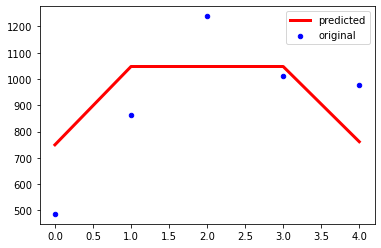

In [165]:
# plotting model
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=20, color="blue", label="original")
plt.plot(x_ax, y_pred_forest, color="red", label="predicted", linewidth=3)
plt.legend()
plt.show()

In [166]:
print("Root Mean Squared Error dari Decision Tree", mean_squared_error(y_test, y_pred_tree, squared=False))
print("Root Mean Squared Error dari Gradient Boosting", mean_squared_error(y_test, y_pred_gradient, squared=False))
print("Root Mean Squared Error dari Random Forest", mean_squared_error(y_test, y_pred_forest, squared=False))

Root Mean Squared Error dari Decision Tree 230.089221824926
Root Mean Squared Error dari Gradient Boosting 674.7673449228156
Root Mean Squared Error dari Random Forest 193.76608142040624


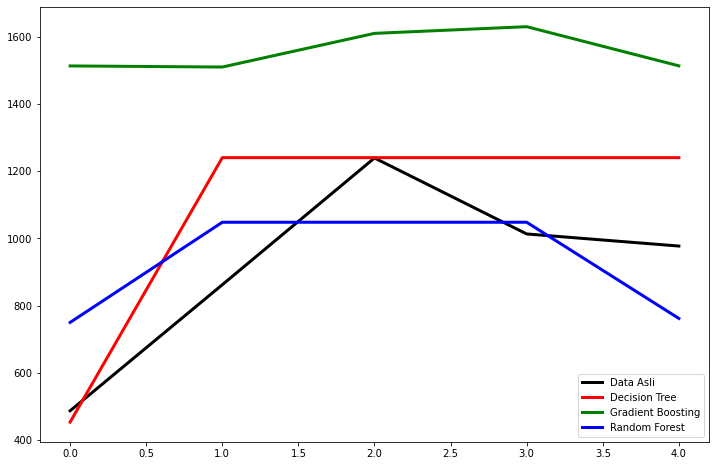

In [167]:
# Plotting kombinasi ketiga model
plt.figure(figsize=(12,8))
plt.plot(np.arange(len(y_test)), y_test, label = "Data Asli", color="k", linewidth=3)
plt.plot(np.arange(len(y_test)), y_pred_tree, label = "Decision Tree", color="r", linewidth=3)
plt.plot(np.arange(len(y_test)), y_pred_gradient, label = "Gradient Boosting", color="g", linewidth=3)
plt.plot(np.arange(len(y_test)), y_pred_forest, label = "Random Forest", color="b", linewidth=3)
plt.legend()
plt.show()

**Analisa:**

Berdasarkan root mean squared error dari ketiga model di atas, model Random Forest memberikan angka RMSE yang paling kecil. Selain itu, berdasarkan hasil visualisasi di atas, terlihat bahwa model Random Forest merupakan model yang paling baik dalam mengikuti pola data yang ada meskipun tidak tepat sepenuhnya. Model Decision Tree tidak mampu menangkap perubahan pola sedangkan model Gradient Boost memberikan prediksi angka yang terlalu tinggi. Kami menyimpulkan model Random Forest adalah model yang terbaik diantara kedua model lainnya.

## 4. Gunakan PCA untuk data pada langkah 2, lalu buatlah model machine learning kembali sama seperti pada langkah 4.

In [168]:
# Menerapkan PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
X_train

array([[ 4.50571502, -1.38885255],
       [ 4.61212135, -1.46313716],
       [ 5.85593112, -3.71541236],
       [ 5.02322291, -4.6992095 ],
       [ 3.14716144, -0.05982447],
       [ 3.00337281,  5.03373381],
       [ 3.22519345,  1.32514871],
       [ 3.29329718,  1.01214523],
       [ 2.62200868,  0.36699029],
       [ 2.78093161,  1.1930474 ],
       [ 2.25638299,  0.17632158],
       [ 1.74797114,  1.71631536],
       [ 1.41292351,  1.26194564],
       [ 0.69573536,  1.57101629],
       [ 0.41748377,  0.79463854],
       [ 0.29381453,  0.8673777 ],
       [ 0.28042416,  0.206683  ],
       [-0.01157151, -0.59967925],
       [-0.68410704,  0.71093209],
       [-1.23379083,  0.92478313],
       [-1.70003209,  0.55381574],
       [-2.16580419,  0.54570002],
       [-2.34416342,  0.47043591],
       [-2.25768429, -0.8563681 ],
       [-2.98255131, -0.86198723],
       [-3.65289043, -0.10291719],
       [-3.98767235, -0.02688334],
       [-4.54646601, -0.39704206],
       [-4.71361577,

### Decision Tree Regressor

In [169]:
# Menacari max_depth untuk decision tree
lists = []
for i in range(1,100):
    reg = DecisionTreeRegressor(max_depth = i, random_state=0)
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    lists.append(mean_squared_error(y_test, y_pred))
print("MSE minimum =", min(lists), "dengan max depth =", lists.index(min(lists))+1)

MSE minimum = 60895.115625 dengan max depth = 1


In [170]:
# Membuat model decision tree regressor dengan max depth = 1
tree_reg = DecisionTreeRegressor(max_depth = 1, random_state=0)
tree_reg.fit(X_train, y_train)

# Melakukan prediksi
y_pred_tree = tree_reg.predict(X_train)
y_pred_tree_test = tree_reg.predict(X_test)
y_pred_tree_test

array([912.125, 912.125, 912.125, 912.125, 912.125])

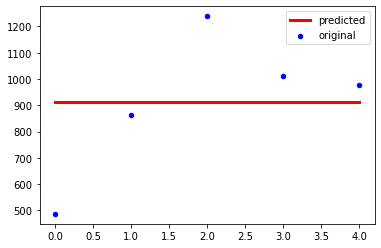

In [171]:
# plotting model
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=20, color="blue", label="original")
plt.plot(x_ax, y_pred_tree_test, color="red", label="predicted", linewidth=3)
plt.legend()
plt.show()

### Gradient Boost

In [172]:
# Mencari loss function untuk gradient boost regressor
from sklearn.ensemble import GradientBoostingRegressor

for i in {'ls', 'lad', 'huber', 'quantile'}:
    gradient_reg = GradientBoostingRegressor(loss = i, random_state=0)
    gradient_reg.fit(X_train, y_train.ravel())
    y_pred_2 = gradient_reg.predict(X_test)
    print("Loss =", i + ", MSE =", mean_squared_error(y_test, y_pred_2))

Loss = ls, MSE = 79794.8465546472
Loss = lad, MSE = 115480.66012662111
Loss = quantile, MSE = 255259.82646286386
Loss = huber, MSE = 86853.53326129253


In [173]:
# Membuat model gradient boost regressor dengan loss = huber
gradient_reg = GradientBoostingRegressor(loss = "huber", random_state=0)
gradient_reg.fit(X_train, y_train.ravel())
y_pred_gradient = gradient_reg.predict(X_train)
y_pred_gradient_test = gradient_reg.predict(X_test)
y_pred_gradient_test

array([1107.95094796, 1007.7189302 , 1107.95094796, 1107.95094796,
        941.4466126 ])

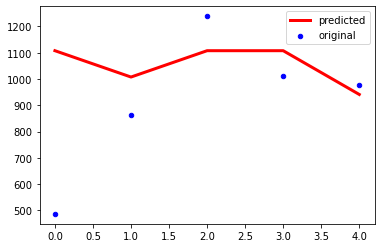

In [174]:
# plotting model
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=20, color="blue", label="original")
plt.plot(x_ax, y_pred_gradient_test, color="red", label="predicted", linewidth=3)
plt.legend()
plt.show()

### Random Forest Regressor

In [175]:
# Menacari max_depth untuk rendom forest regressor
from sklearn.ensemble import RandomForestRegressor

lists = []
for i in range(1,50):
    reg = RandomForestRegressor(max_depth=i, random_state=0)
    reg.fit(X_train, y_train.ravel())
    y_pred = reg.predict(X_test)
    lists.append(mean_squared_error(y_test, y_pred))
print("MSE minimum =", min(lists), "dengan max depth =", lists.index(min(lists))+1)

MSE minimum = 62317.00991723776 dengan max depth = 2


In [176]:
# Membuat model gradient boost regressor dengan max depth = 2
forest_reg = RandomForestRegressor(max_depth=2, random_state=0)
forest_reg.fit(X_train, y_train.ravel())
y_pred_forest = forest_reg.predict(X_train)
y_pred_forest_test = forest_reg.predict(X_test)
y_pred_forest_test

array([964.4240157 , 980.21203951, 980.21203951, 964.4240157 ,
       958.38716073])

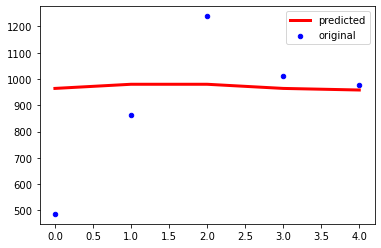

In [177]:
# plotting model
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=20, color="blue", label="original")
plt.plot(x_ax, y_pred_forest_test, color="red", label="predicted", linewidth=3)
plt.legend()
plt.show()

In [178]:
print("Root Mean Squared Error dari Decision Tree", mean_squared_error(y_test, y_pred_tree_test, squared=False))
print("Root Mean Squared Error dari Gradient Boosting", mean_squared_error(y_test, y_pred_gradient_test, squared=False))
print("Root Mean Squared Error dari Random Forest", mean_squared_error(y_test, y_pred_forest_test, squared=False))

Root Mean Squared Error dari Decision Tree 246.76935714346706
Root Mean Squared Error dari Gradient Boosting 294.70923511368375
Root Mean Squared Error dari Random Forest 249.63375155863392


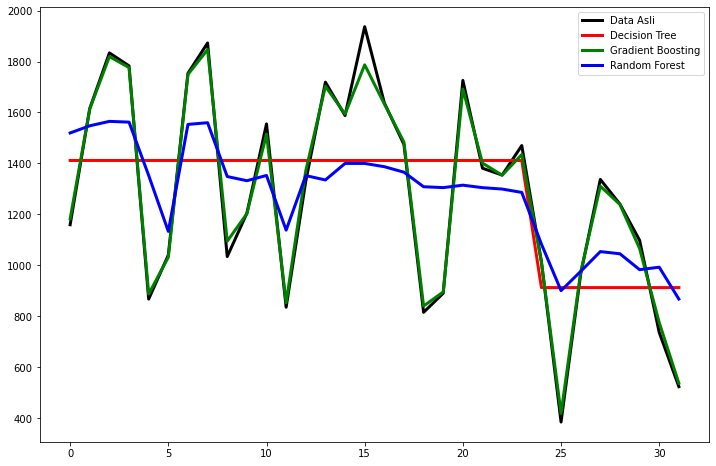

In [179]:
# Plot kombinasi hasil prediksi pada data latih
plt.figure(figsize=(12,8))
plt.plot(np.arange(len(y_train)), y_train, label = "Data Asli", color="k", linewidth=3)
plt.plot(np.arange(len(y_train)), y_pred_tree, label = "Decision Tree", color="r", linewidth=3)
plt.plot(np.arange(len(y_train)), y_pred_gradient, label = "Gradient Boosting", color="g", linewidth=3)
plt.plot(np.arange(len(y_train)), y_pred_forest, label = "Random Forest", color="b", linewidth=3)
plt.legend()
plt.show()

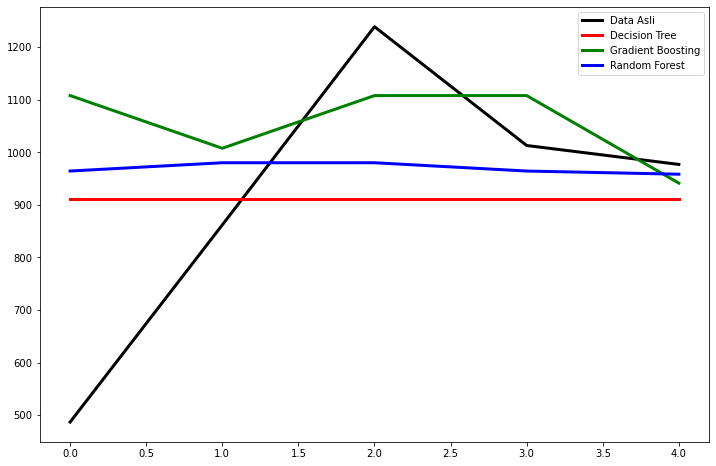

In [180]:
# Plot kombinasi hasil prediksi pada data uji
plt.figure(figsize=(12,8))
plt.plot(np.arange(len(y_test)), y_test, label = "Data Asli", color="k", linewidth=3)
plt.plot(np.arange(len(y_test)), y_pred_tree_test, label = "Decision Tree", color="r", linewidth=3)
plt.plot(np.arange(len(y_test)), y_pred_gradient_test, label = "Gradient Boosting", color="g", linewidth=3)
plt.plot(np.arange(len(y_test)), y_pred_forest_test, label = "Random Forest", color="b", linewidth=3)
plt.legend()
plt.show()

**Analisa:**

1. Berdasarkan root mean squred error dari ketiga model di atas, maka pada kasus langkah 4 ini justru model yang memberikan angka RMSE yang paling kecil adalah Decision Tree. Akan tetapi, berdasarkan hasil visualisasi di atas, model Decision Tree tidak mampu menangkap informasi yang ada (underfitting). Model Gradient Boosting juga terlalu terpaku pada data latih (overfitting) sehingga menghasilkan RMSE yang paling tinggi. Kami menyimpulkan model Random Forest tetap menjadi model yang terbaik diantara kedua model lainnya baik sebelum maupun sesudah dilakukan PCA. Random Forest memang tidak memberikan hasil RMSE yang paling rendah, tetapi tidak terlihat adanya indikasi terjadi overfitting dan underfitting seperti pada kedua model lainnya.
2. Setelah dilakukan PCA, model Gradient Boosting mendapatkan peningkatan performa yang sangat signifikan. AKan tetapi, model Decision Tree dan Random Forest mengalami sedikit penurunan. Secara keseluruhan RMSE yang paling rendah kita dapatkan dari model Random Forest saat belum dilakukan PCA. Kemungkinan hal ini diakibatkan reduksi dimensi terlalu jauh sehingga variance/informasi yang didapatkan berkurang drastis. Jika melihat rata-rata dari RMSE ketiga model, maka dapat disimpulkan bahwa PCA memberikan peningkatan performa. Namun, hasil terbaik tetap dipegang oleh salah satu model pada data yang belum dilakukan PCA.

## 5. Tambahkan kolom baru pada data langkah 2 dengan nama ’Kelas’, lalu lakukan pembagian sebagai berikut:
### • Jika nilai kolom Positivity Rate kurang dari 3.3 persen diberi nilai 0
### • Jika nilai kolom Positivity Rate lebih dari 5.0 persen diberi nilai 2
### • Sisanya diberi nilai 1

In [181]:
# Menambahkan kolom baru dengan nama "Kelas"
# Jika nilai kolom Positivity Rate kurang dari 3.3 persen diberi nilai 0
datasets.loc[datasets["Positivity Rate Harian"] < 0.033, "Kelas"] = 0
# Jika nilai kolom Positivity Rate lebih dari 3.3 dan kurang dari 5.0 persen diberi nilai 1
datasets.loc[(datasets["Positivity Rate Harian"] <= 0.05) & (0.033 <= datasets["Positivity Rate Harian"]), "Kelas"] = 1
# Jika nilai kolom Positity Rate kurang dari 5.0 persen diberi nilai 2 
datasets.loc[datasets["Positivity Rate Harian"] > 0.05, "Kelas"] = 2
print(datasets[["Kelas"]])

# # Mendefinisikan target variable
y = datasets["Kelas"]
y_train  = y[:32]
y_test = y[32:]

    Kelas
0     1.0
1     1.0
2     2.0
3     1.0
4     1.0
5     0.0
6     1.0
7     2.0
8     1.0
9     1.0
10    1.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    1.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    1.0
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.0
30    0.0
31    0.0
32    0.0
33    0.0
34    0.0
35    0.0
36    0.0


## 6. Dari data pada langkah 5, lakukanlah klasifikasi dengan membuat model machine learning sebagai berikut:

### Voting Classifiers yang di dalamnya terdapat beberapa model, yaitu: RandomForestClassifier, SVC, Logistic Regression

In [182]:
# Membuat model Ensemble Learning yang terdapat RandomForestClassifier, Voting Classifier, dan Logistic Regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

random_clf = RandomForestClassifier(n_estimators=50, random_state=0)
log_reg = LogisticRegression(solver="lbfgs", random_state=0)
svm_clf = SVC(kernel = "sigmoid", random_state=0)
voting_clf = VotingClassifier(estimators=[('lr', log_reg), ('rf', random_clf), ('svc', svm_clf)], voting='hard')

# Fitting keempat model
random_clf.fit(X_train, y_train.values.ravel())
log_reg.fit(X_train, y_train.values.ravel())
svm_clf.fit(X_train, y_train.values.ravel())
voting_clf.fit(X_train, y_train.values.ravel())

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=0)),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=0)),
                             ('svc', SVC(kernel='sigmoid', random_state=0))])

In [183]:
# Mendefinisikan fungsi untuk melakukan plotting
from matplotlib.colors import ListedColormap
def plot(X_train, X_test, y_train, y_test, clf):
    axes=[-10, 10, -10, 10]
    plt.figure(figsize=(12,8))
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.5, cmap=custom_cmap)
    custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
    plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X_train[:, 0][y_train.values.reshape(-1)==0], X_train[:, 1][y_train.values.reshape(-1)==0], "ro", label = "Train set kategori 0")
    plt.plot(X_train[:, 0][y_train.values.reshape(-1)==1], X_train[:, 1][y_train.values.reshape(-1)==1], "yo", label = "Train set kategori 1")
    plt.plot(X_train[:, 0][y_train.values.reshape(-1)==2], X_train[:, 1][y_train.values.reshape(-1)==2], "bo", label = "Train set kategori 2")
    plt.plot(X_test[:, 0][y_test.values.reshape(-1)==0], X_test[:, 1][y_test.values.reshape(-1)==0], "rs", label="Test set kategori 0")
    plt.plot(X_test[:, 0][y_test.values.reshape(-1)==1], X_test[:, 1][y_test.values.reshape(-1)==1], "ys", label="Test set kategori 1")
    plt.plot(X_test[:, 0][y_test.values.reshape(-1)==2], X_test[:, 1][y_test.values.reshape(-1)==2], "bs", label="Test set kategori 2")
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    plt.legend()
    plt.title(clf.__class__.__name__, fontsize=20)    

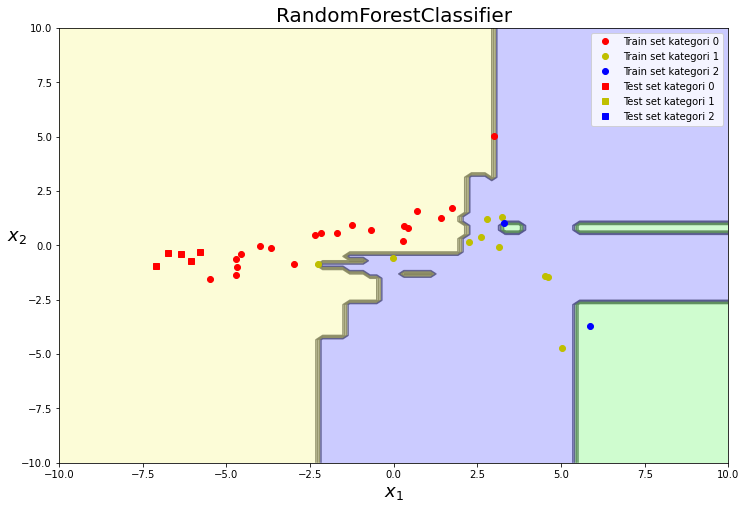

In [184]:
# Plotting random forest classifier
plot(X_train, X_test, y_train, y_test, random_clf)

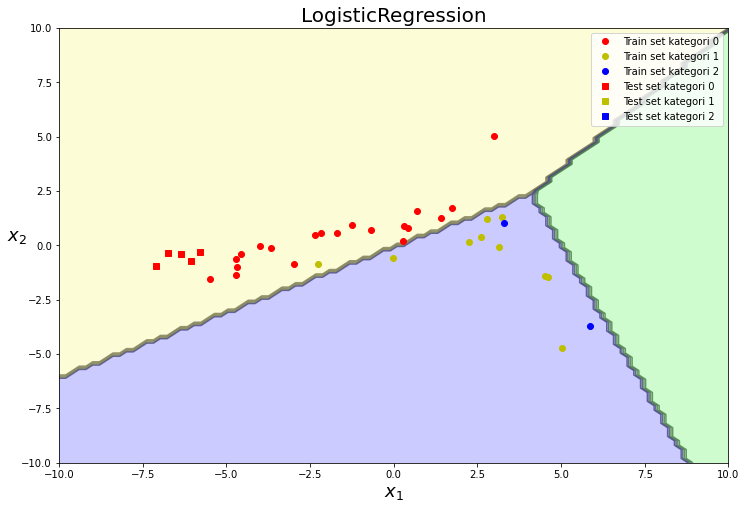

In [185]:
# Plotting logistic regression
plot(X_train, X_test, y_train, y_test, log_reg)    

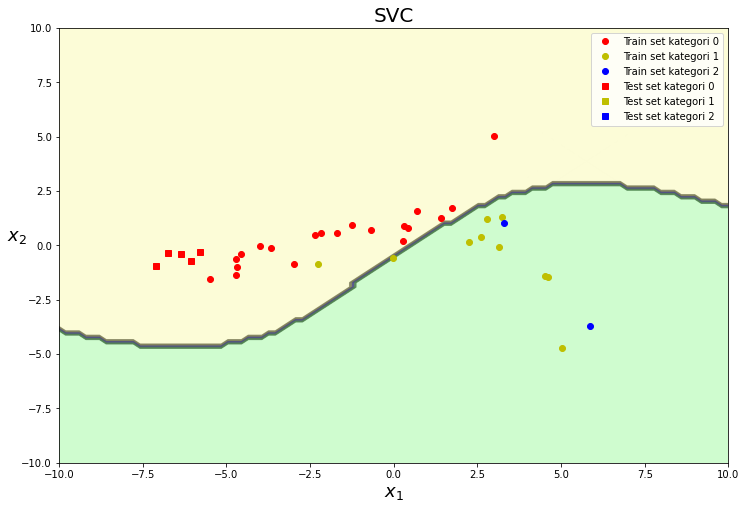

In [186]:
# Plotting support vector machine
plot(X_train, X_test, y_train, y_test, svm_clf)    

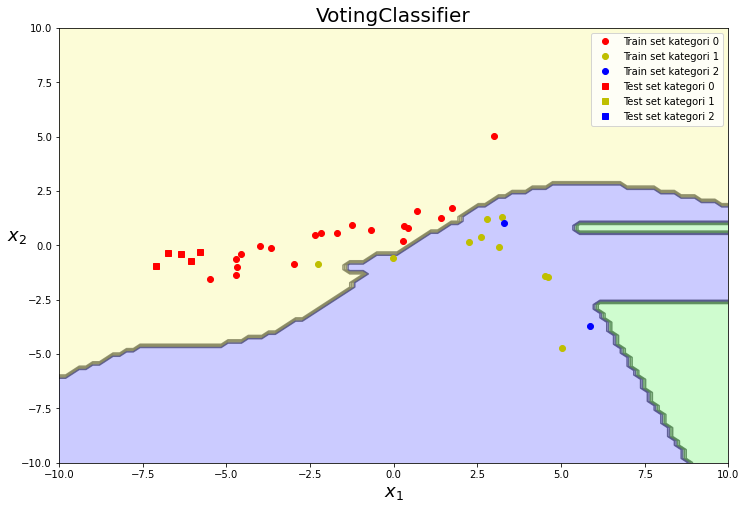

In [187]:

# Plotting Voting Classifier
plot(X_train, X_test, y_train, y_test, voting_clf)    

In [188]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
for clf in (random_clf, log_reg, svm_clf, voting_clf):
    clf.fit(X_train, y_train.values.ravel())
    y_pred = clf.predict(X_train)
    y_pred2 = clf.predict(X_test)
    print('Akurasi {} untuk data uji'.format(clf.__class__.__name__),accuracy_score(y_train,y_pred))
    print('Akurasi {} untuk data latih'.format(clf.__class__.__name__),accuracy_score(y_test,y_pred2))

Akurasi RandomForestClassifier untuk data uji 1.0
Akurasi RandomForestClassifier untuk data latih 1.0
Akurasi LogisticRegression untuk data uji 0.90625
Akurasi LogisticRegression untuk data latih 1.0
Akurasi SVC untuk data uji 0.90625
Akurasi SVC untuk data latih 1.0
Akurasi VotingClassifier untuk data uji 0.90625
Akurasi VotingClassifier untuk data latih 1.0


### Adaboost

In [189]:
# Membuat model Boosting dengan AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

# Mencari learning rate terbaik
for i in range(1,11):
    i/=10
    abc = AdaBoostClassifier(learning_rate=i, random_state=42)
    abc.fit(X_train, y_train.values.ravel())
    y_pred = abc.predict(X_train)
    y_pred2 = abc.predict(X_test)

    print('Akurasi AdaBoostClassifier untuk data uji dengan learning rate = {} adalah'.format(i),accuracy_score(y_test,y_pred2))

Akurasi AdaBoostClassifier untuk data uji dengan learning rate = 0.1 adalah 0.0
Akurasi AdaBoostClassifier untuk data uji dengan learning rate = 0.2 adalah 0.0
Akurasi AdaBoostClassifier untuk data uji dengan learning rate = 0.3 adalah 0.0
Akurasi AdaBoostClassifier untuk data uji dengan learning rate = 0.4 adalah 0.0
Akurasi AdaBoostClassifier untuk data uji dengan learning rate = 0.5 adalah 0.0
Akurasi AdaBoostClassifier untuk data uji dengan learning rate = 0.6 adalah 0.0
Akurasi AdaBoostClassifier untuk data uji dengan learning rate = 0.7 adalah 0.0
Akurasi AdaBoostClassifier untuk data uji dengan learning rate = 0.8 adalah 0.0
Akurasi AdaBoostClassifier untuk data uji dengan learning rate = 0.9 adalah 1.0
Akurasi AdaBoostClassifier untuk data uji dengan learning rate = 1.0 adalah 0.0


In [190]:
# Membuat model AdaBoost dengan learning rate = 0.9
abc = AdaBoostClassifier(learning_rate=0.9, random_state=42)
abc.fit(X_train, y_train.values.ravel())
y_pred = abc.predict(X_train)
y_pred2 = abc.predict(X_test)

print('Akurasi AdaBoostClassifier untuk data latih adalah',accuracy_score(y_train,y_pred))
print('Akurasi AdaBoostClassifier untuk data uji adalah',accuracy_score(y_test,y_pred2))

Akurasi AdaBoostClassifier untuk data latih adalah 1.0
Akurasi AdaBoostClassifier untuk data uji adalah 1.0


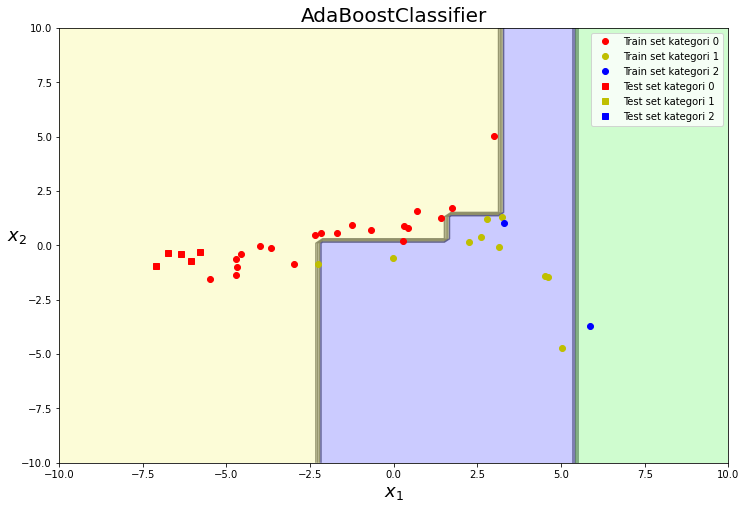

In [191]:
# Plotting AdaBoost
plot(X_train, X_test, y_train, y_test, abc)  

**Analisa**

Melalui hasil visualisasi dan nilai akurasi dari masing-masing model, terlihat jelas bahwa Voting Classifier dan AdaBoost mampu melakukan prediksi yang tepat pada data uji, hal ini dikarenakan data yang diujikan tidak terlalu banyak dan data juga terseparasi dengan baik. Terlihat dari visualisasi bahwa data tidak acak dan tidak terdapat pencilan. Jika mempertimbangkan akurasi model pada data latih, maka AdaBoost Classifier adalah model yang terbaik karena memiliki akurasi yang sempurna.